## Loan eligibility prediction
### Features Description:

- **ID:** Unique identifier for each loan record.
- **year:** Year of loan issuance.
- **loan_limit:** Loan limit category.
- **Gender:** Loan applicant gender.
- **approv_in_adv:** Indicates whether the loan has been pre-approved.
- **loan_type:** Type of loan.
- **loan_purpose:** Purpose of the loan.
- **Credit_Worthiness:** The extent to which a person or company is considered suitable for receiving financial credit is often based on its reliability in repaying money in the past.
- **open_credit:** Indicates whether the applicant has other open credits.
- **business_or_commercial:** Whether the loan is for business or commercial.
- **loan_amount:** Total loan amount.
- **rate_of_interest:** Loan interest rate.
- **Interest_rate_spread:** Interest rate differential relative to a benchmark index.
- **Upfront_charges:** Initial charges for the loan.
- **term:** Loan duration in months.
- **Neg_ammortization:** Indicates whether there is negative amortization.
- **interest_only:** Whether the loan allows for interest-only payments.
- **lump_sum_payment:** Indicates whether there is an option to pay in a single installment.
- **property_value:** Value of the property associated with the loan.
- **construction_type:** Type of construction of the property.
- **occupancy_type:** Type of property occupancy.
- **Secured_by:** Type of loan guarantee.
- **total_units:** Number of units related to the loan.
- **income:** Loan applicant's income.
- **credit_type:** Type of credit check used.
- **Credit_Score:** Applicant's credit score.
- **co-applicant_credit_type:** Type of credit check for co-applicants.
- **age:** Age range of the applicant.
- **submission_of_application:** Loan application submission method.
- **LTV (Loan to Value):** Ratio of loan amount to property value.
- **Region:** Geographic region of the loan.
- **Security_Type:** Type of loan security.
- **Status:** Loan Status (1 loan granted, 0 not granted)
- **dtir1 (Debt to Income Ratio):** Debt/income ratio of the applicant.


In [45]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer

In [46]:
df = pd.read_csv("Loan.csv")

In [47]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [48]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [49]:
# Data shape
df.shape

(148670, 34)

In [50]:
# statistics
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Credit factors according to Forbes.com https://www.forbes.com/advisor/personal-loans/personal-loan-requirements/

- Credit Score and History
- Income
- Debt-to-income Ratio
- Collateral
- Origination Fee

In [51]:
# Excluding features
df.drop(['ID' , 'year' , 'loan_limit','Gender', 'approv_in_adv','loan_type', 'loan_purpose', 'Credit_Worthiness','open_credit',
        'business_or_commercial', 'rate_of_interest', 'Interest_rate_spread', 'Neg_ammortization', 'interest_only',
        'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type',
        'co-applicant_credit_type', 'submission_of_application', 'Region', 'Security_Type'], axis = 1, inplace = True)

In [52]:
# Column names
df.head()

,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,age,LTV,Status,dtir1
0,116500,NaN,360.0,118000.0,1740.0,758,25-34,98.728814,1,45.0
1,206500,NaN,360.0,NaN,4980.0,552,55-64,NaN,1,NaN
2,406500,595.0,360.0,508000.0,9480.0,834,35-44,80.019685,0,46.0
3,456500,NaN,360.0,658000.0,11880.0,587,45-54,69.376900,0,42.0
4,696500,0.0,360.0,758000.0,10440.0,602,25-34,91.886544,0,39.0


<AxesSubplot: >

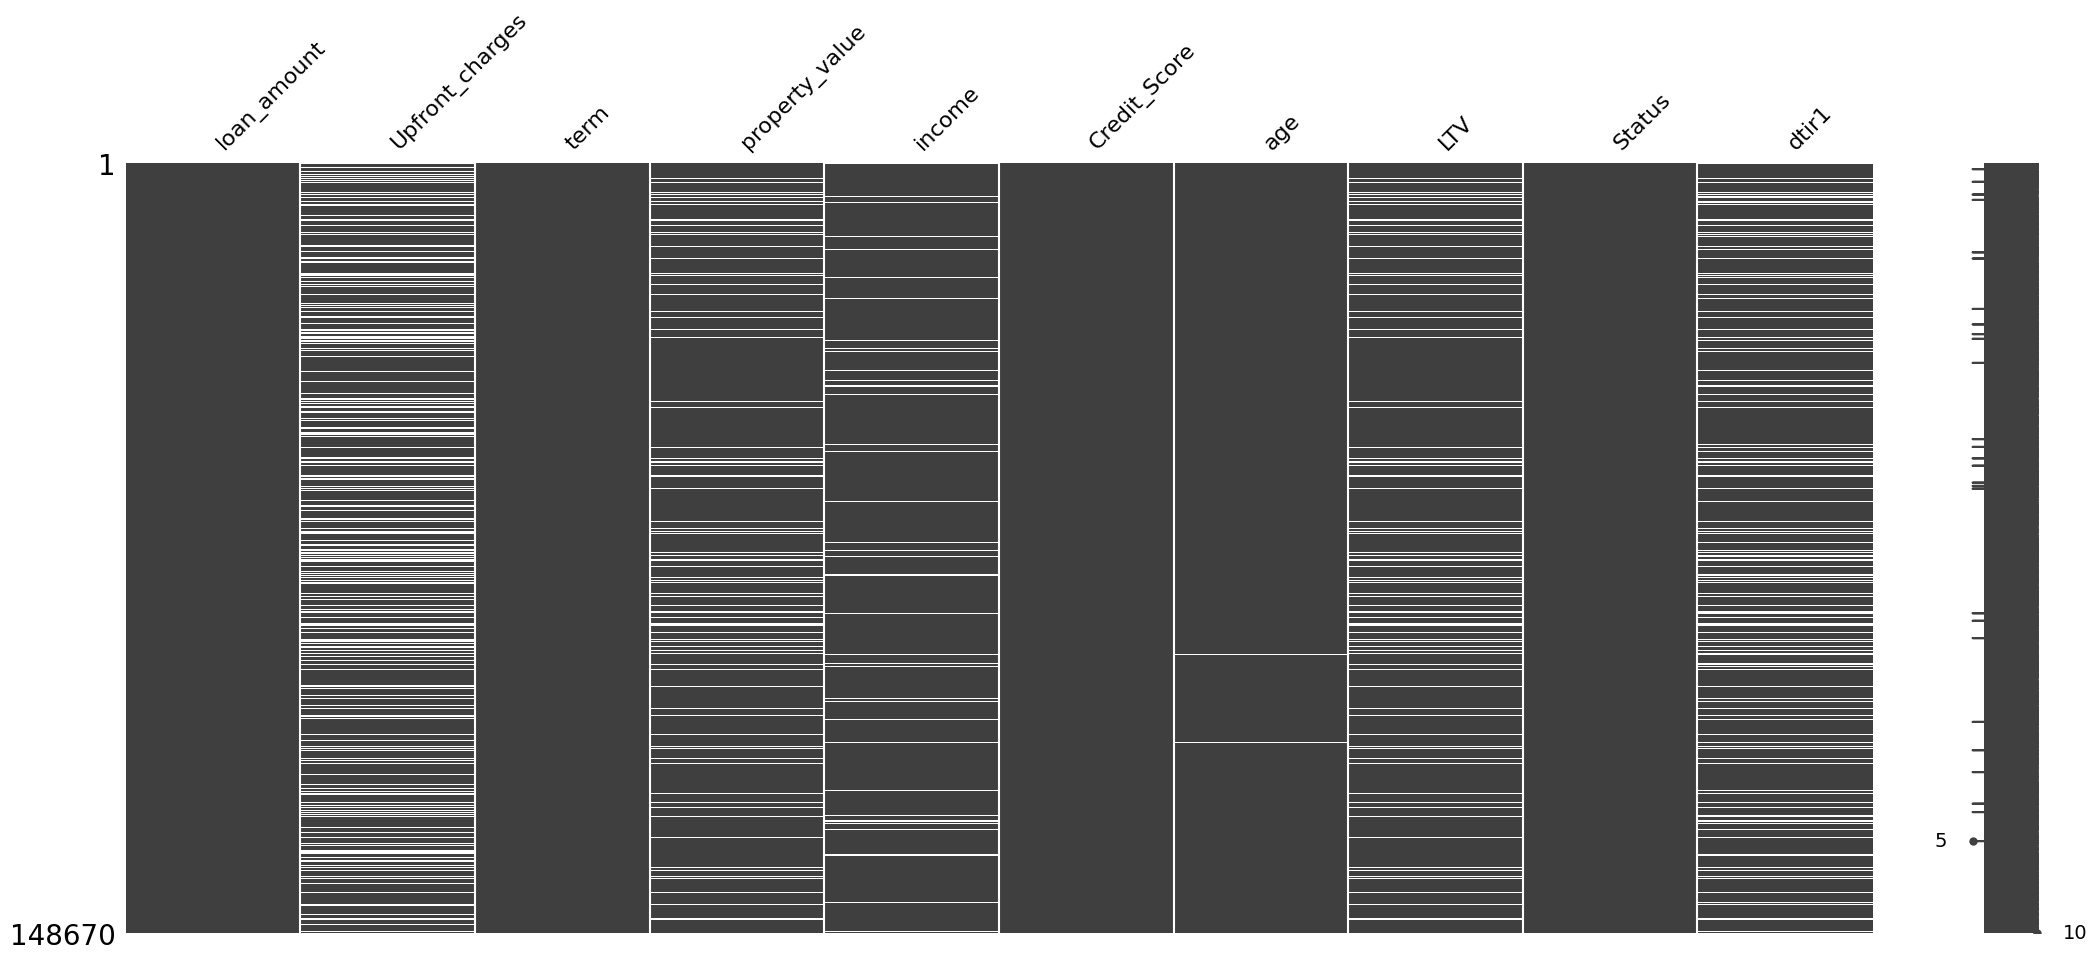

In [53]:
# Ploting missing data
msno.matrix(df)

In [54]:
# Missing data
df.isnull().sum()

loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
age                  200
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [55]:
# Missing values percent
def miss_val_summary(df):
    total = df.shape[0]
    miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    miss_percent = {}
    for col in miss_columns:
        null_count = df[col].isnull().sum()
        percent = (null_count/total) * 100
        miss_percent[col] = percent
        print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))
    return miss_percent

In [56]:
miss_percent = miss_val_summary(df)

Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


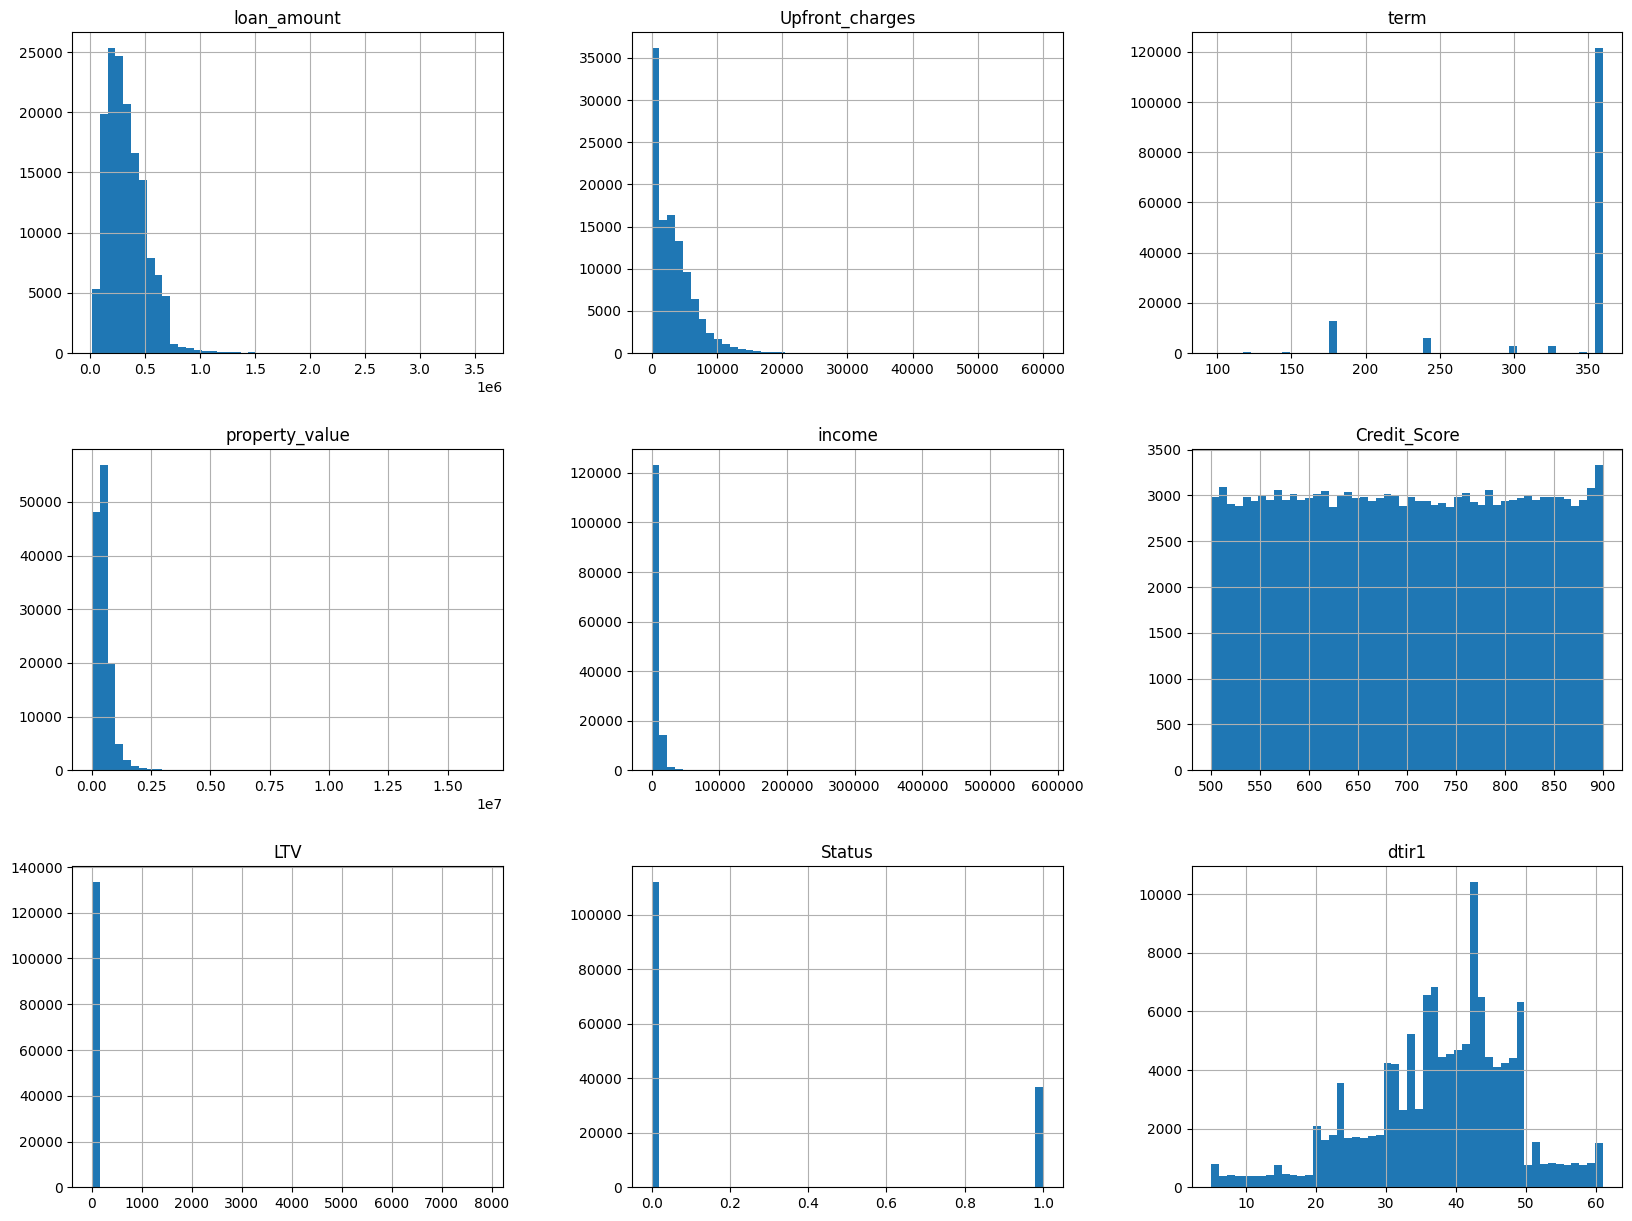

In [57]:
# Numerical data histogram
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [58]:
# Only numerical features
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(num_cols)
df_num = df[num_cols]
df_num.shape
df_num.head()

['loan_amount', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [59]:
# Numerical Features Correlations
corr_matrix = df_num.corr()
corr_matrix['Status'].sort_values(ascending = False)

Status             1.000000
dtir1              0.078083
LTV                0.038895
Credit_Score       0.004004
term              -0.000240
Upfront_charges   -0.019138
loan_amount       -0.036825
property_value    -0.048864
income            -0.065119
Name: Status, dtype: float64

In [60]:
df_num.head(10)

,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
5,706500,370.00,360.0,1008000.0,10080.0,864,70.089286,0,40.0
6,346500,5120.00,360.0,438000.0,5040.0,860,79.109589,0,44.0
7,266500,5609.88,360.0,308000.0,3780.0,863,86.525974,0,42.0
8,376500,1150.00,360.0,478000.0,5580.0,580,78.765690,0,44.0
9,436500,2316.50,360.0,688000.0,6720.0,788,63.444767,0,30.0


In [61]:
# Looking into the numerical features
df_num.describe()

,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [62]:
# Looking into the numerical features with missing values
df_num.isnull().sum()

loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
LTV                15098
Status                 0
dtir1              24121
dtype: int64

## filling null values

In [63]:
# Using the mean value to replace missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_num)

In [64]:
pd_num_imputed = pd.DataFrame(X, columns = df_num.columns)

In [65]:
pd_num_imputed.head()

,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [66]:
pd_num_imputed.isnull().sum()

loan_amount        0
Upfront_charges    0
term               0
property_value     0
income             0
Credit_Score       0
LTV                0
Status             0
dtir1              0
dtype: int64

In [67]:
# Only categorical variables
obj=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj.append(i)
obj

['age']

In [68]:
# Categorical variables values
unique_values = df['age'].unique()
print(unique_values)

['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]


In [69]:
# Looking into the categorical features with missing values
df[obj].isnull().sum()

age    200
dtype: int64

In [70]:
df_cat = df[obj]
df_cat.head()

,age
0,25-34
1,55-64
2,35-44
3,45-54
4,25-34


In [71]:
df = df_cat.join(pd_num_imputed)

In [72]:
df.isnull().sum()

age                200
loan_amount          0
Upfront_charges      0
term                 0
property_value       0
income               0
Credit_Score         0
LTV                  0
Status               0
dtir1                0
dtype: int64

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

age                0
loan_amount        0
Upfront_charges    0
term               0
property_value     0
income             0
Credit_Score       0
LTV                0
Status             0
dtir1              0
dtype: int64

In [75]:
# status value count
df['Status'].value_counts()

0.0    112031
1.0     36439
Name: Status, dtype: int64

In [76]:
df.head()

,age,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,25-34,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,55-64,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,35-44,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,45-54,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,25-34,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [77]:
df.to_csv('clean.csv', index = False)

## encoding Ordinal categorical column

In [78]:
df.head()

,age,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,25-34,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,55-64,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,35-44,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,45-54,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,25-34,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [79]:
age_mapping = {
    '<25': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65-74': 6,
    '>74': 7
}

# Map the age categories to numerical values
df['age'] = df['age'].map(age_mapping)

In [80]:
df.head()

,age,loan_amount,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,2,116500.0,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,5,206500.0,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,3,406500.0,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,4,456500.0,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,2,696500.0,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


# ML Model

In [81]:
### Split into training and validation set
from sklearn.model_selection import StratifiedKFold, train_test_split

y = df["Status"]

X = df.drop(["Status"], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, stratify = y, random_state = 0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (118776, 9)
X_test shape: (29694, 9)
y_train shape: (118776,)
y_test shape: (29694,)


In [83]:
predict = tree.predict(X_test)
predict

array([0., 0., 0., ..., 1., 0., 0.])

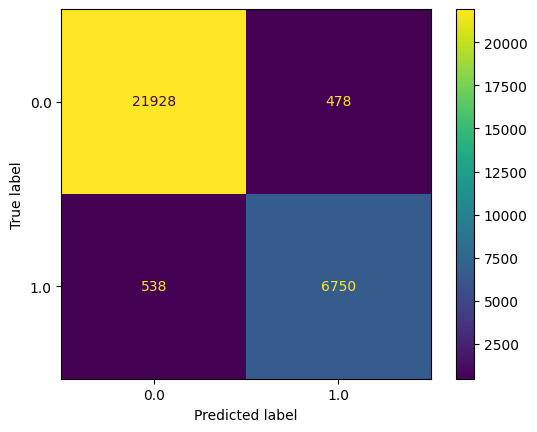

Model Metrics:
Accuracy:  0.9657843335353944
Precision:  0.9338682899833979
Recall:  0.9261800219538968
F1 score:  0.9300082667401489


In [84]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
conf_mat = confusion_matrix(y_test, predict)

# Decision Tree metrics
ConfusionMatrixDisplay.from_predictions(y_test, predict)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, predict))
print("Precision: ", precision_score(y_test, predict))
print("Recall: ", recall_score(y_test, predict))
print("F1 score: ", f1_score(y_test, predict))

## Balancing the dataset using SMOTE (Synthetic Minority Over-sampling Technique).

In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=3)
X, y = smote.fit_resample(X, y)

y.value_counts()

1.0    112031
0.0    112031
Name: Status, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (179249, 9)
X_test shape: (44813, 9)
y_train shape: (179249,)
y_test shape: (44813,)


In [87]:
predict_2 = tree.predict(X_test)
predict_2

array([0., 1., 1., ..., 0., 1., 0.])

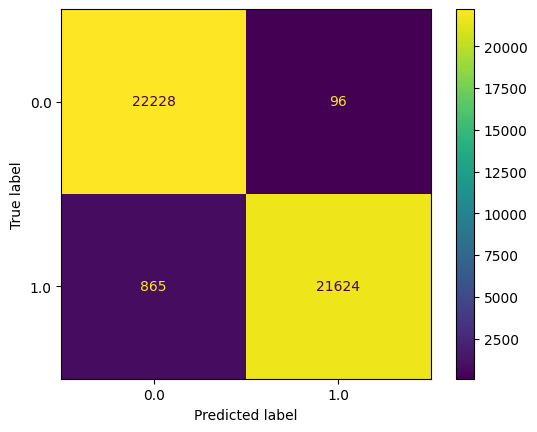

Model Metrics:
Accuracy:  0.9785553299265838
Precision:  0.9955801104972376
Recall:  0.9615367513006359
F1 score:  0.9782623447714266


In [88]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
conf_mat = confusion_matrix(y_test, predict_2)

# Decision Tree metrics
ConfusionMatrixDisplay.from_predictions(y_test, predict_2)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, predict_2))
print("Precision: ", precision_score(y_test, predict_2))
print("Recall: ", recall_score(y_test, predict_2))
print("F1 score: ", f1_score(y_test, predict_2))

In [89]:
# Third model:Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [90]:
predict_3 = lr.predict(X_test)
predict_3

array([1., 1., 1., ..., 1., 0., 0.])

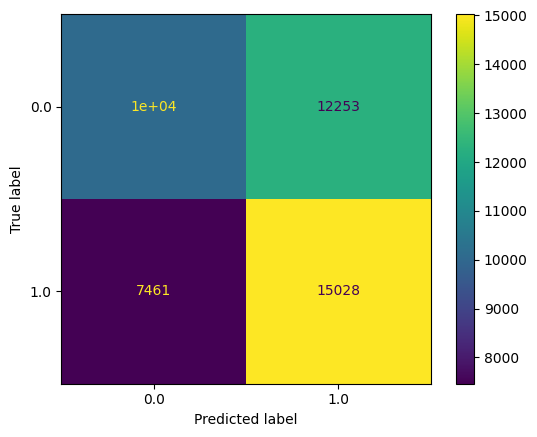

Model Metrics:
Accuracy:  0.5600830116260906
Precision:  0.5508595725963125
Recall:  0.6682378051491841
F1 score:  0.603897930480209


In [91]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
conf_mat = confusion_matrix(y_test, predict_3)

# Decision Tree metrics
ConfusionMatrixDisplay.from_predictions(y_test, predict_3)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, predict_3))
print("Precision: ", precision_score(y_test, predict_3))
print("Recall: ", recall_score(y_test, predict_3))
print("F1 score: ", f1_score(y_test, predict_3))

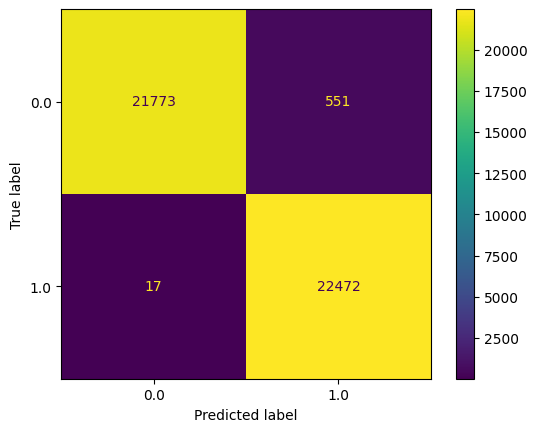

Model Metrics:
Accuracy:  0.9873251065539018
Precision:  0.9760674108500196
Recall:  0.9992440748810529
F1 score:  0.9875197750043945


In [92]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predict_4 = rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_4)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, predict_4))
print("Precision: ", precision_score(y_test, predict_4))
print("Recall: ", recall_score(y_test, predict_4))
print("F1 score: ", f1_score(y_test, predict_4))

## Model Fine-Tune

In [93]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [2, 4, 6],
    'bootstrap': [True, False],
}

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                          scoring = 'accuracy', verbose = 2, n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....bootstrap=True, max_features=2, n_estimators=50; total time=   7.3s
[CV] END ....bootstrap=True, max_features=2, n_estimators=50; total time=   7.4s
[CV] END ....bootstrap=True, max_features=2, n_estimators=50; total time=   7.5s
[CV] END ....bootstrap=True, max_features=2, n_estimators=50; total time=   7.6s
[CV] END ....bootstrap=True, max_features=2, n_estimators=50; total time=   7.7s
[CV] END ...bootstrap=True, max_features=2, n_estimators=100; total time=  14.3s
[CV] END ...bootstrap=True, max_features=2, n_estimators=100; total time=  14.4s
[CV] END ...bootstrap=True, max_features=2, n_estimators=100; total time=  14.7s
[CV] END ...bootstrap=True, max_features=2, n_estimators=100; total time=  14.2s
[CV] END ...bootstrap=True, max_features=2, n_estimators=100; total time=  14.2s
[CV] END ....bootstrap=True, max_features=4, n_estimators=50; total time=  11.4s
[CV] END ....bootstrap=True, max_features=4, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [94]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200}

In [95]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_predictions

array([0., 1., 1., ..., 0., 1., 0.])

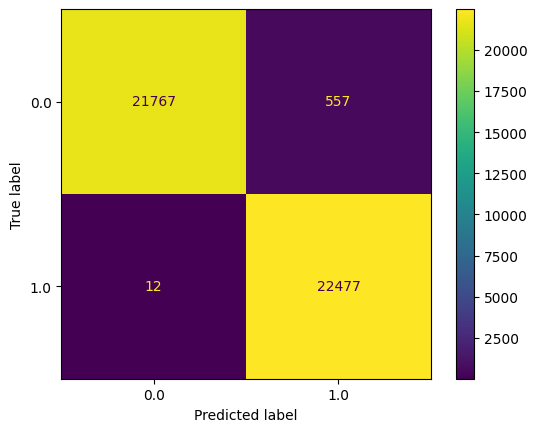

Final Model Metrics:
Accuracy:  0.9873027916006516
Precision:  0.9758183554745159
Recall:  0.9994664057983903
F1 score:  0.9875008237594183


In [96]:
# Final Model
ConfusionMatrixDisplay.from_predictions(y_test, final_predictions)
plt.show()
print("Final Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, final_predictions))
print("Precision: ", precision_score(y_test, final_predictions))
print("Recall: ", recall_score(y_test, final_predictions))
print("F1 score: ", f1_score(y_test, final_predictions))

In [97]:
import joblib

joblib.dump(final_model, 'model.joblib')

['model.joblib']

In [141]:
import pandas as pd
import joblib

model = joblib.load('model.joblib')


input_data = pd.DataFrame({
    'age': '55-64',  
    'loan_amount': [76500.0],
    'Upfront_charges': [3224.996127],
    'term': [360.0],
    'property_value': [108000.0],
    'income': [1555.891060],
    'Credit_Score': [803.259917],
    'LTV': [65.88983051],
    'dtir1': [36]
})

input_data['age'] = input_data['age'].map(age_mapping)

predictions = model.predict(input_data)

print(predictions)


[1.]
